
# **💳 Credit Risk Classification Analysis**

## 👤**Author:** Okoiti Patrice



## 🔍 **1.0 Business Understanding**
---

In the financial services industry, credit risk represents one of the most critical areas of concern for banks and lending institutions. The loan defaults can significantly impact a financial institution's profitability and stability. With growing access to personal financial and demographic data, banks have an opportunity to leverage data-driven approaches to better assess creditworthiness and reduce default rates. This project aims to analyze historical loan data to identify factors associated with loan defaults and build a predictive model to improve credit risk assessment. By doing so, the institution can strengthen its lending strategies, minimize losses, and ensure better portfolio health.





### ⚠️ **1.1 Challenges**


Key challenges include:

- Understanding the profile of borrowers who are likely to default.
- Determining how demographic features (age, gender, education) and loan purpose correlate with credit risk.
- Identifying which variables most influence loan default.
- Developing a robust and interpretable classification model with high predictive accuracy of atleast 80%.
- Balancing predictive performance with regulatory and ethical considerations such as fairness and explainability.



### 💡 **1.2 Proposed Solution**


Conduct a comprehensive analysis of historical bank loan data to:
- Explore and visualize differences in demographic and loan characteristics between good (non-defaulting) and bad (defaulting) loans.
- Examine the relationship between interest rates and loan defaults to understand how pricing might reflect or influence credit risk.
- Apply feature selection and machine learning techniques to identify key predictors of default.
- Train and evaluate multiple classification models, selecting the best-performing one based on accuracy, precision, recall, and AUC-ROC metrics.
- Provide actionable insights and recommendations for improving credit risk assessment policies.



### ✅ **1.3 Conclusion**


By leveraging credit data, banks can proactively identify high-risk borrowers, price loans more appropriately, and improve approval decisions. This project will help develop a predictive model and provide strategic recommendations that reduce default rates and optimize loan portfolio performance, ensuring more secure and data-informed lending practices.



### 📌 **1.4 Problem Statement**


Mambo Leo commercial bank seeks to improve its ability to assess the creditworthiness of loan applicants to reduce default risk. The current risk assessment process is insufficient and relies heavily on manual checks and scoring models. The bank wants to use historical loan data to identify key risk indicators and build a predictive model that can accurately classify applicants as likely to default or not. 



### 🎯 **1.5 Objectives**


1. To explore the characteristics of good and bad loans based on borrower demographics (age, gender, education) and loan purpose.
2. To analyze the relationship between interest rates and the likelihood of loan default.
3. To identify the most influential features contributing to credit risk.
4. To build and evaluate a predictive classification model that achieves an accuracy of at least 80% in identifying potential defaulters.



## 📊 **2.0 Data Undertanding**
---

### 🌐 **2.1 Data Source**


The dataset contains anonymized bank loan applications information from kaggle, https://www.kaggle.com/datasets/udaymalviya/bank-loan-data/data, detailing revelant borrower information and loan performance indicators.



### 🧾 **2.2 column description**


Key features include:

1. **Demographics**
- `person_age`: Age of the applicant (in years).
- `person_gender`: Gender of the applicant (male, female).
- `person_education`: Educational background (High School, Bachelor, Master, etc.).

2. **Financial**
- `person_income`: Annual income of the applicant (in USD).
- `person_emp_exp`: Years of employment experience.
- `person_home_ownership`: Type of home ownership (RENT, OWN, MORTGAGE).

3. **Loan Details**
- `loan_amnt`: Loan amount requested (in USD).
- `loan_intent`: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).
- `loan_int_rate`: Interest rate on the loan (percentage).
- `loan_percent_income`: Ratio of loan amount to income.

4. **Credit History**
- `cb_person_cred_hist_length`: Length of the applicant's credit history (in years).
- `credit_score`: Credit score of the applicant.
- `previous_loan_defaults_on_file`: Whether the applicant has previous loan defaults (Yes or No).

3. **Target Variable**
- `loan_status`: 0 if the loan was repaid successfully, 1 if the applicant defaulted.


### 📊 **2.3 Exploratory Data Analysis**


In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_curve,\
      auc, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,\
    recall_score, f1_score
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.model_selection import GridSearchCV


In [2]:
# load the data
data = pd.read_csv("data/loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# Get overall info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Data has no missing values

In [4]:
# summary statistics of the numerical data
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


The data max age is 144, this might be an error.

In [5]:
# filter out categorical columns
cat_cols = data.select_dtypes('object')

# Identify the unique values of each categorical column
for col in cat_cols.columns:
    print(f"{col}: \n{cat_cols[col].unique()}\n")

person_gender: 
['female' 'male']

person_education: 
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_home_ownership: 
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: 
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

previous_loan_defaults_on_file: 
['No' 'Yes']



#### 🎯 2.3.1 Distribution of Loan Status

In [6]:
# distribution of target variable
print(data['loan_status'].value_counts(), '\n')
print(round(data['loan_status'].value_counts(normalize=True)*100))

loan_status
0    35000
1    10000
Name: count, dtype: int64 

loan_status
0    78.0
1    22.0
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Loan Status Distribution')

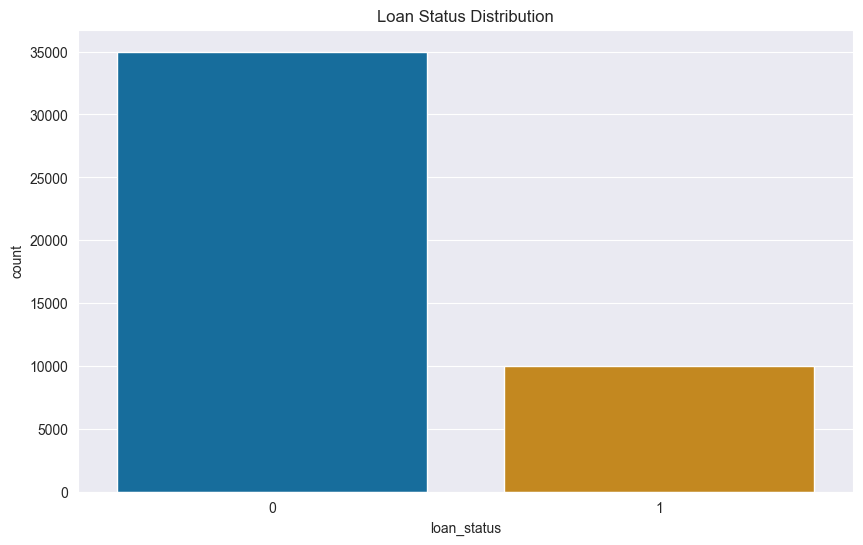

In [7]:
# set grid style
sns.set_style(style='darkgrid')

# plot the loan status distribution count
plt.figure(figsize=(10,6))
sns.countplot(data=data, 
              x='loan_status', 
              hue='loan_status', 
              palette="colorblind",
              legend=False)
plt.title('Loan Status Distribution')

The graph above shows the Class imbalance in the target variable

#### 🎯 2.3.2 Default Rate by Demographics

,person_gender,loan_status,count,default_rate
1,female,1,4485,0.099667
3,male,1,5515,0.122556


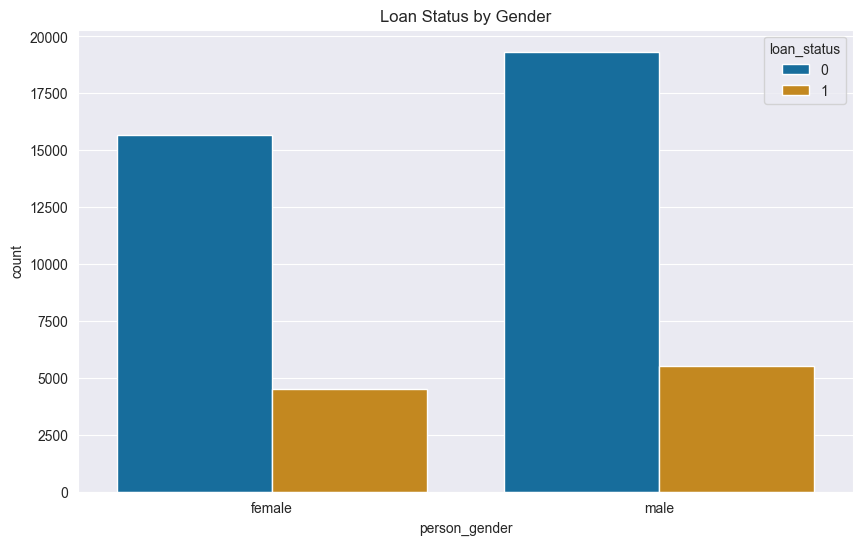

In [8]:
# Create a bar plot for the distribution
age_default_counts = (pd.DataFrame(data.groupby('person_gender')
                                   ['loan_status'].value_counts()
                                   .reset_index())
                                   )
# age_default_counts

plt.figure(figsize=(10,6))
sns.barplot(data=age_default_counts, 
            x='person_gender',
            y='count',
            hue='loan_status', 
            palette='colorblind')
plt.title('Loan Status by Gender')

# Default rate by Gender
age_default_counts['default_rate'] = (age_default_counts['count']
                                      /age_default_counts['count'].sum()
                                      )
(age_default_counts[(age_default_counts['loan_status']==1)]
 .sort_values(by='default_rate')
 )

Even though, their is class imbalance, from the above output, it can be seen that the distribution of default risk is fairly even between the genders, reducing probability of bias towards a certain gender.

,person_education,loan_status,count,default_rate
3,Bachelor,1,3018,0.067067
7,High School,1,2671,0.059356
1,Associate,1,2650,0.058889
9,Master,1,1519,0.033756
5,Doctorate,1,142,0.003156


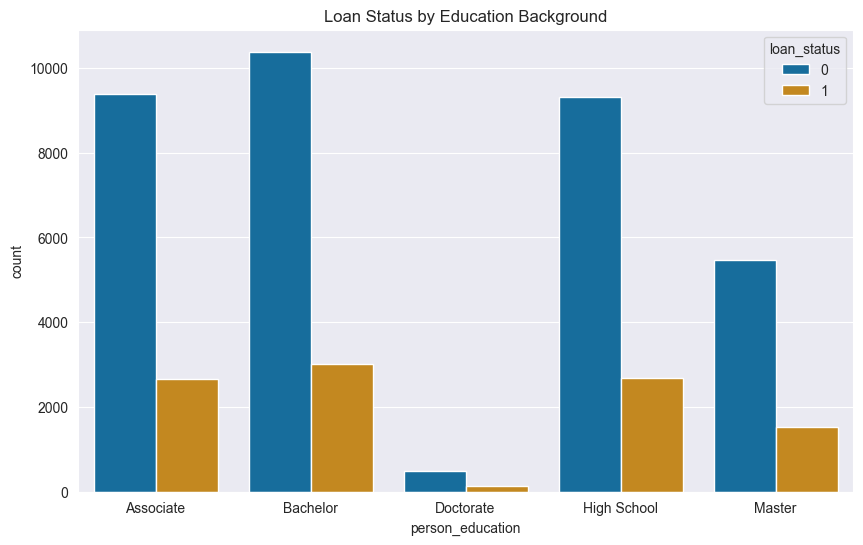

In [9]:
# Create a bar plot for the distribution
edu_default_counts = (pd.DataFrame(data.groupby('person_education')
                                   ['loan_status']
                                   .value_counts())
                                   .reset_index()
                                 )
# edu_default_counts

plt.figure(figsize=(10,6))
sns.barplot(data=edu_default_counts, 
            x='person_education', 
            y='count', 
            hue='loan_status', 
            palette='colorblind')
plt.title('Loan Status by Education Background')

# Default rate by Education level
edu_default_counts['default_rate']=(edu_default_counts['count']/
                                    edu_default_counts['count'].sum()
                                   )

(edu_default_counts[edu_default_counts['loan_status']==1]
 .sort_values(by='default_rate', ascending=False)
)


From the above output, it can be seen that higher education background correlates with stronger repayment capacity.

#### 🎯 2.3.3 Loan Purpose and Risk

,loan_intent,loan_status,count,default_rate
7,MEDICAL,1,2378,0.052844
1,DEBTCONSOLIDATION,1,2163,0.048067
3,EDUCATION,1,1552,0.034489
9,PERSONAL,1,1521,0.033800
5,HOMEIMPROVEMENT,1,1258,0.027956
11,VENTURE,1,1128,0.025067


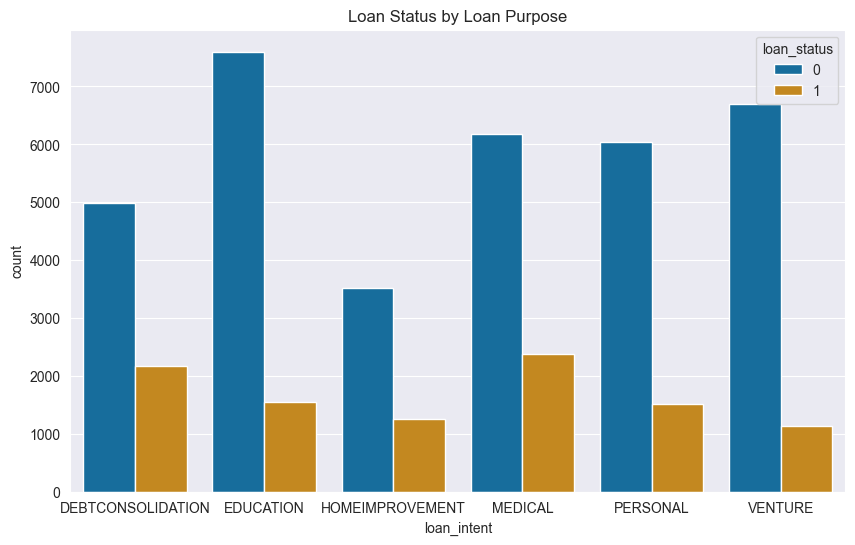

In [10]:
# Default rate by purpose
intent_default_count = (pd.DataFrame(data.groupby('loan_intent')['loan_status']
                                     .value_counts()).reset_index()
                        )
# intent_default_count

# plot the default distribution
plt.figure(figsize=(10,6))
sns.barplot(data=intent_default_count, 
            x='loan_intent',
            y= 'count',
            hue='loan_status',
            palette='colorblind')
plt.title('Loan Status by Loan Purpose')

intent_default_count['default_rate'] = (intent_default_count['count']/
                                        intent_default_count['count'].sum()
                                        )
(intent_default_count[intent_default_count['loan_status']==1]
 .sort_values(by='default_rate', ascending=False)
 )


Medical loans have the highest default rates.

<function matplotlib.pyplot.show(close=None, block=None)>

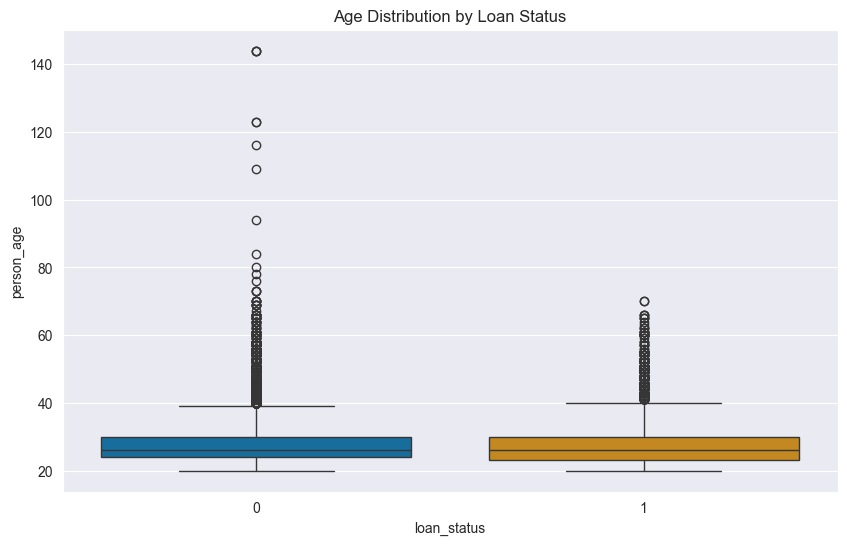

In [11]:
# Default by Age
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='loan_status', 
            y='person_age', 
            hue='loan_status', 
            palette='colorblind',
            legend=False)
plt.title('Age Distribution by Loan Status')
plt.show

Young borrowers tend to have high default rate

#### 🎯 2.3.4 Interest Rate vs Default

In [12]:
# Correlation between loan status and interest rate
data['loan_int_rate'].corr(data['loan_status'])

np.float64(0.332004647415078)

Text(0.5, 1.0, 'Interest Rate by Loan Status')

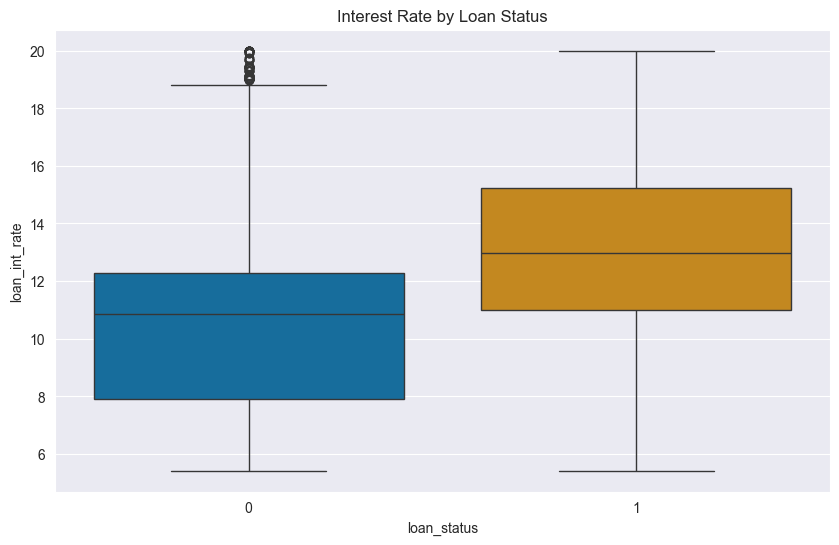

In [13]:
# Interest rate and default
plt.figure(figsize=(10,6))
sns.boxplot(data=data, 
            x='loan_status', 
            y='loan_int_rate',
            hue='loan_status',
            palette='colorblind',
            legend=False)
plt.title('Interest Rate by Loan Status')


From the above output, it can be seemn that higher interest rates are assigned to borrowers with high risk of default.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

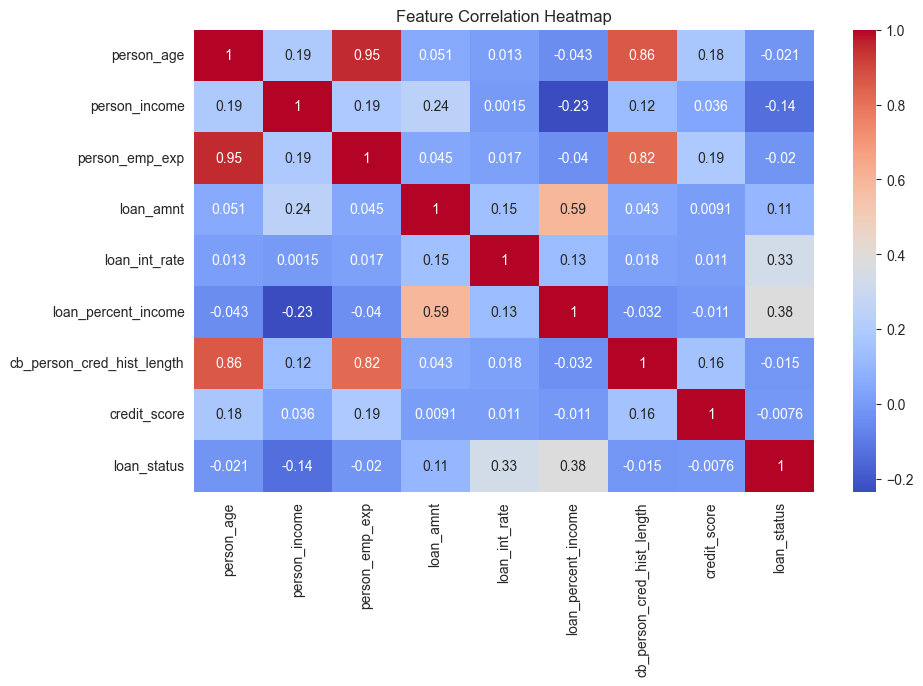

In [14]:
num_cols = data.select_dtypes('number')

# Numerical Features Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')


Key insights from the above output:
- Loan amount, interest rate and percentage of income show some relationship with loan_status.
- There exists strong multicollinearity between age, employment experience, and credit history length.
- Credit score appears relatively independent of other factors in this dataset.

<Figure size 1000x600 with 0 Axes>

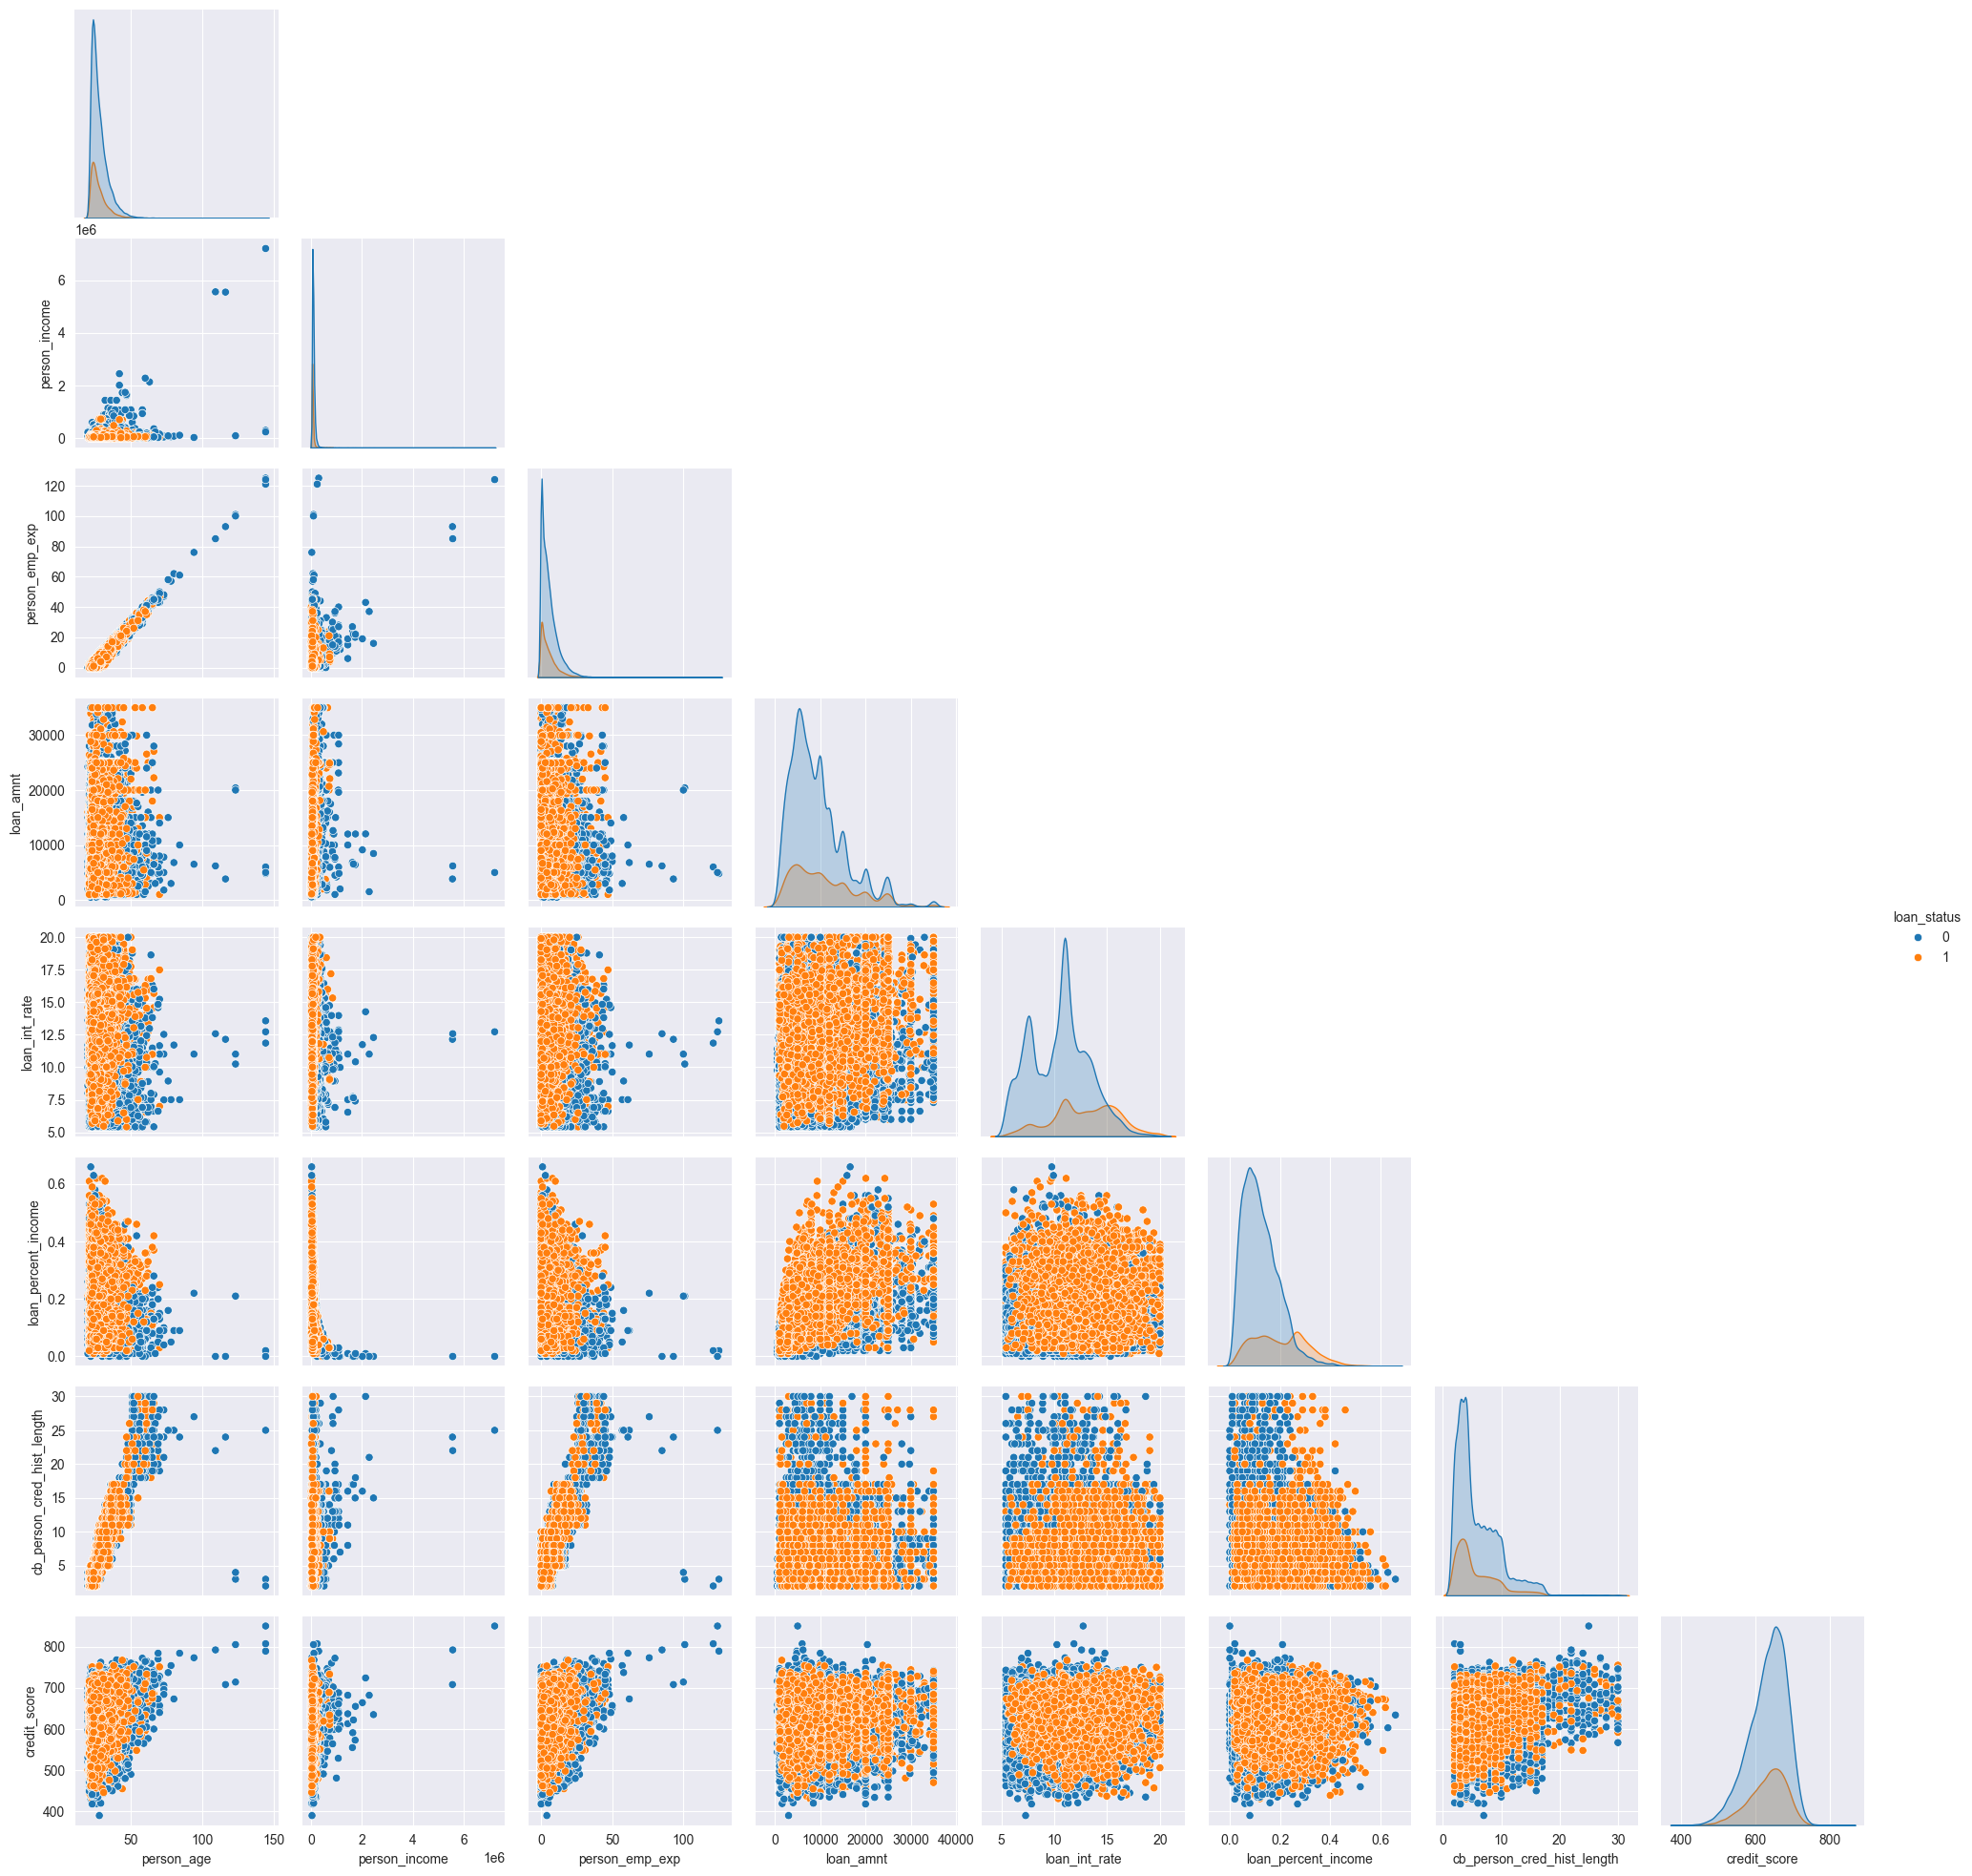

In [15]:
# Analyze the distributions of the features against each feature
plt.figure(figsize=(10,6))
sns.pairplot(data=data, corner=True, hue='loan_status')
plt.show()


## 🧹 **3.0 Data Preparation**
---

### 🧼 **3.1 Data cleaning**

In [16]:
# Remove age outliers
data = data[(data['person_age'] >= 18) & (data['person_age'] <= 100)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_gender                   44993 non-null  object 
 2   person_education                44993 non-null  object 
 3   person_income                   44993 non-null  float64
 4   person_emp_exp                  44993 non-null  int64  
 5   person_home_ownership           44993 non-null  object 
 6   loan_amnt                       44993 non-null  float64
 7   loan_intent                     44993 non-null  object 
 8   loan_int_rate                   44993 non-null  float64
 9   loan_percent_income             44993 non-null  float64
 10  cb_person_cred_hist_length      44993 non-null  float64
 11  credit_score                    44993 non-null  int64  
 12  previous_loan_defaults_on_file  44993

In [17]:
# Create a copy of the dataframe
credit = data.copy()

# Handle missing values
credit.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

The dataset has no missing values

### 🛠️ **3.2 Preprocessing**

In [18]:
# Binary encode for category columns with two classes
def binary_encoder(data, cols):
    """
    Create a function that converts category columns with two classes into binary

    """
    df = data[cols]

    for col in df:
        cats = df[col].unique()
        print(f"{col}:\n{cats[0]}:0,{cats[1]}:1\n")
        data.replace({cats[0]: 0, cats[1]: 1 }, inplace=True)        

    return data

In [19]:
# Function for dropping the first dummy variable

def drop_first(data, cols):
    """
    Function that manually drops first dummy variable of the encoded data
    
    """
    col_drop = []
    for col in cols:
        dummy_col = []
        for i in data.columns:
            if i.startswith(col):
                dummy_col.append(i)
        col_drop.append(dummy_col[0])
    data.drop(columns=col_drop, inplace=True)

    return data

In [20]:
# Separate the features and target
X = credit.drop(columns='loan_status')
y = credit['loan_status']

# split the data with test size of 0.2 and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y,
                                                     test_size=0.25,
                                                     random_state=42)

# Encode previous_loan_defaults_on_file with binary
cols = ['previous_loan_defaults_on_file']
X_train = binary_encoder(data=X_train, cols=cols)
X_test = binary_encoder(data=X_test, cols=cols)

# Ordinal encode the person_education feature
edu_order = [{'col': 'person_education',
              'mapping': {'High School': 1,
                          'Associate': 2,
                          'Bachelor': 3,
                          'Master': 4,
                          'Doctorate': 5}}]
ode = ce.OrdinalEncoder(cols='person_education', mapping=edu_order)
X_train = ode.fit_transform(X_train)
X_test = ode.transform(X_test)

# One Hot Encode categorical columns
cat_cols_ohe = ['person_gender','person_home_ownership','loan_intent']
ohe = ce.OneHotEncoder(cols=cat_cols_ohe, use_cat_names=True)
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

# Manually drop the first column of encoded features of training data
X_train = drop_first(data=X_train, cols=cat_cols_ohe)
X_test = drop_first(data=X_test, cols=cat_cols_ohe)


previous_loan_defaults_on_file:
No:0,Yes:1

previous_loan_defaults_on_file:
No:0,Yes:1



C:\Users\HP\AppData\Local\Temp\ipykernel_23868\2662492982.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({cats[0]: 0, cats[1]: 1 }, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23868\2662492982.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({cats[0]: 0, cats[1]: 1 }, inplace=True)



## 🤖 **4.0 Modeling**
---

### **4.1 Logistic Regression**

AUC score: 0.9560334305360116
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8757
           1       0.78      0.75      0.77      2492

    accuracy                           0.90     11249
   macro avg       0.86      0.84      0.85     11249
weighted avg       0.90      0.90      0.90     11249



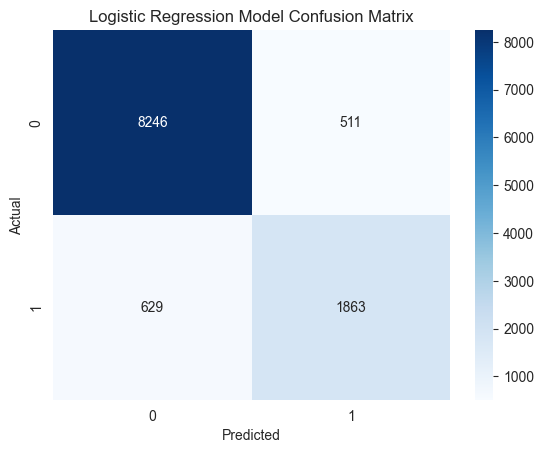

In [21]:
# Normalize
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the model
lr_scaled = LogisticRegression(max_iter=1000)
lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_scaled.predict(X_test_scaled)

# Auc score
scaled_score = lr_scaled.decision_function(X_test_scaled)
test_fpr_lr, test_tpr_lr, thresh = roc_curve(y_test, scaled_score)
scaled_auc_lr = auc(test_fpr_lr, test_tpr_lr)

print(f"AUC score: {scaled_auc_lr}")
print(classification_report(y_true=y_test, y_pred=y_pred_lr_scaled))

# confusion matrix for the predictions
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred_lr_scaled)
sns.heatmap(cfm, fmt='d', annot=True, cmap="Blues")
plt.title("Logistic Regression Model Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


This is the base model for the project. It offers strong auc score and accuracy while the recall and f1-score are solid but below our 80% mark

### **4.2 Decision Tree**

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters (Grid Search): {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10} 

AUC score: 0.9076991788820721
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8757
           1       0.82      0.75      0.79      2492

    accuracy                           0.91     11249
   macro avg       0.88      0.85      0.86     11249
weighted avg       0.91      0.91      0.91     11249



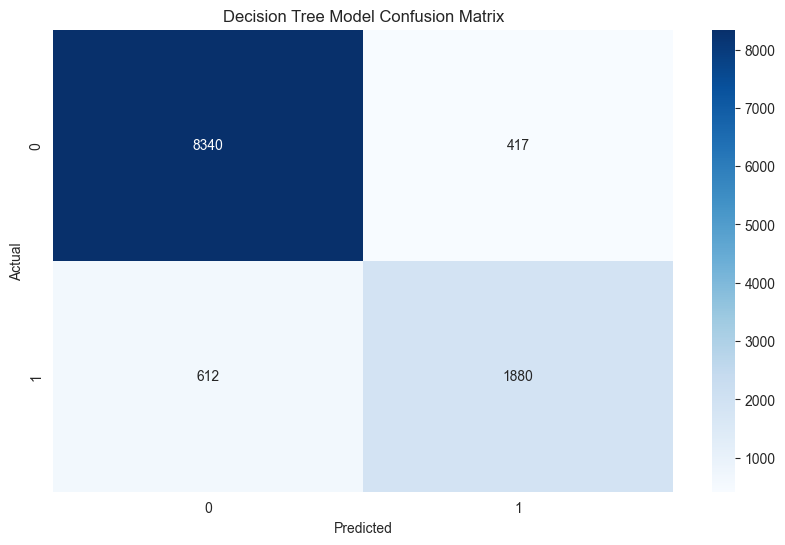

In [22]:
# Normalize
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid
dct_params = {'max_depth': [3, 5, 10, 15, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'criterion': ['gini', 'entropy']}

# train the model
dct_scaled = DecisionTreeClassifier(random_state=42)

# Grid Search
dct_scaled_grid = GridSearchCV(estimator=dct_scaled,
                       param_grid=dct_params,
                       scoring='recall',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

dct_scaled_grid.fit(X_train_scaled, y_train)
best_dct_scaled = dct_scaled_grid.best_estimator_
y_pred_dct_scaled1 = best_dct_scaled.predict(X_test_scaled)

# Auc score
scaled_score = best_dct_scaled.predict_proba(X_test_scaled)[:, 1]
test_fpr_dct1, test_tpr_dct1, thresh = roc_curve(y_test, scaled_score)
scaled_auc_dct1 = auc(test_fpr_dct1, test_tpr_dct1)

print("Best parameters (Grid Search):", dct_scaled_grid.best_params_,"\n")
print(f"AUC score: {scaled_auc_dct1}")
print(classification_report(y_true=y_test, y_pred=y_pred_dct_scaled1))

# confusion matrix for the predictions
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred_dct_scaled1)
plt.figure(figsize=(10,6))
sns.heatmap(cfm, fmt='d', annot=True, cmap="Blues")
plt.title("Decision Tree Model Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')

#display
plt.show()

After hyperparameter tuning, decision tree offers an improvement on the logistic regression in terms of f1-score and accuracy, but the auc score has dropped and the recall is below our 80% mark 

### **4.3 Xgboost**

AUC score: 0.9757091368867759
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8757
           1       0.83      0.83      0.83      2492

    accuracy                           0.92     11249
   macro avg       0.89      0.89      0.89     11249
weighted avg       0.92      0.92      0.92     11249



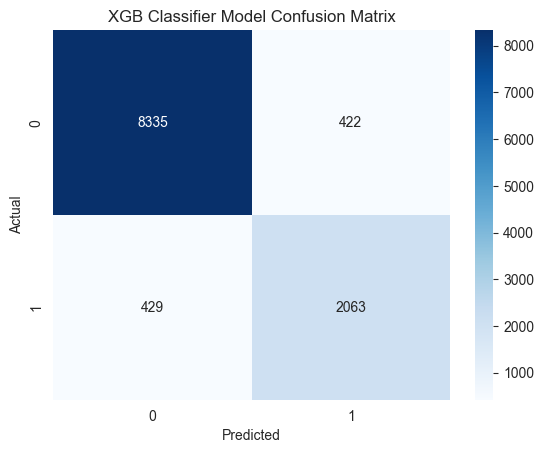

In [23]:
# Balance classes using SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Normalize
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# train the model
xg_smote = XGBClassifier()
xg_smote.fit(X_train_scaled, y_train_smote)
y_pred_xg_smote = xg_smote.predict(X_test_scaled)

# Auc score
scaled_score = xg_smote.predict_proba(X_test_scaled)[:, 1]
test_fpr_xg_smote, test_tpr_xg_smote, thresh = roc_curve(y_test, scaled_score)
smote_auc_xg = auc(test_fpr_xg_smote, test_tpr_xg_smote)

print(f"AUC score: {smote_auc_xg}")
print(classification_report(y_true=y_test, y_pred=y_pred_xg_smote))

# confusion matrix for the predictions
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred_xg_smote)
sns.heatmap(cfm, fmt='d', annot=True, cmap="Blues")
plt.title("XGB Classifier Model Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')

#save
plt.savefig("images/conf_matrix_xg_sm.png", dpi=300, bbox_inches='tight')

plt.show()


The Xgboost model offers an overall improvement of the above models and offers a desired balanced with regards to recall, f1-score and very strong auc-score desired for our business problem 


## 📈 **5.0 Evaluation**
---

In [24]:
def model_evaluation(model, y_test, y_pred, auc):
    """
    Functions that give summary of the model statistics
    
    """
    
    results = {'Model': model,
               'Precision': round(precision_score(y_test, y_pred)*100, 2),
               'Recall': round(recall_score(y_test, y_pred)*100, 2),
               'F1-Score': round(f1_score(y_test, y_pred)*100, 2),
               'Accuracy': round(accuracy_score(y_test, y_pred)*100, 2),
               'AUC': round(auc*100, 2)}
    
    return results    

In [25]:
# create a data frame of the results
results = []
lr = model_evaluation('Logistic Regression', 
                      y_test, 
                      y_pred_lr_scaled, 
                      scaled_auc_lr)
results.append(lr)

dct_hpt = model_evaluation('Decision Tree(HPT)', 
                           y_test, 
                           y_pred_dct_scaled1, 
                           scaled_auc_dct1)
results.append(dct_hpt)

xg_sm = model_evaluation('XGBoost with Smote', 
                          y_test, 
                          y_pred_xg_smote, 
                          smote_auc_xg)
results.append(xg_sm)

Evaluation_df = pd.DataFrame(results)
Evaluation_df


,Model,Precision,Recall,F1-Score,Accuracy,AUC
0,Logistic Regression,78.48,74.76,76.57,89.87,95.60
1,Decision Tree(HPT),81.85,75.44,78.51,90.85,90.77
2,XGBoost with Smote,83.02,82.78,82.90,92.43,97.57


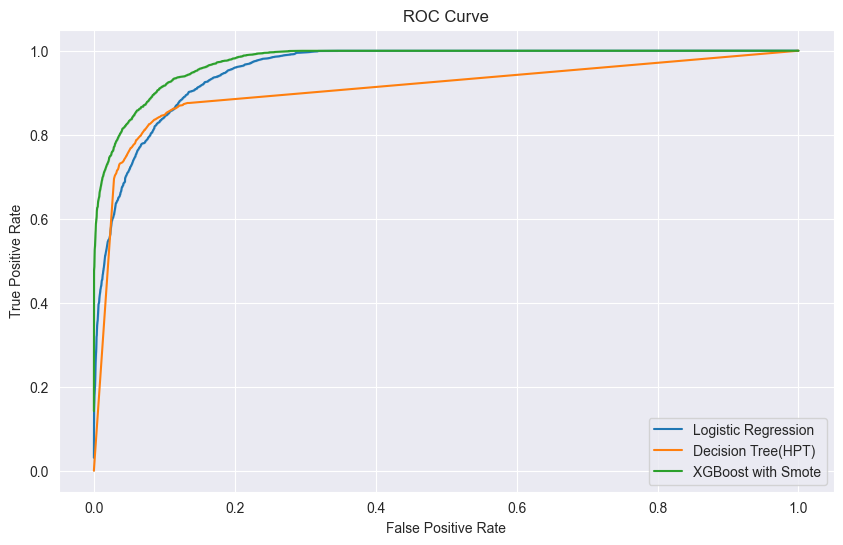

In [26]:
# ROC curve
plt.figure(figsize=(10,6))
sns.lineplot(x=test_fpr_lr, 
             y=test_tpr_lr, 
             label='Logistic Regression')
sns.lineplot(x=test_fpr_dct1, 
             y=test_tpr_dct1, 
             label='Decision Tree(HPT)')
sns.lineplot(x=test_fpr_xg_smote, 
             y=test_tpr_xg_smote, 
             label='XGBoost with Smote')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# save
plt.savefig("images/roc_curve.png", dpi=300, bbox_inches='tight')

#display
plt.show()

In [27]:
#Cost of FNs and FP  
final = X_test.copy()

final['Actual'] = y_test
final['lr_pred'] = y_pred_lr_scaled
final['dct_pred']= y_pred_dct_scaled1
final['xg_pred']= y_pred_xg_smote

# calculate the cost of FP and FN for each model
fp_lr = final[(final['Actual']==0) & (final['lr_pred']==1)]['loan_amnt'].sum()
fn_lr = final[(final['Actual']==1) & (final['lr_pred']==0)]['loan_amnt'].sum()
tp_lr = final[(final['Actual']==1) & (final['lr_pred']==1)]['loan_amnt'].sum()
fp_dct = final[(final['Actual']==0) & (final['dct_pred']==1)]['loan_amnt'].sum()
fn_dct = final[(final['Actual']==1) & (final['dct_pred']==0)]['loan_amnt'].sum()
tp_dct = final[(final['Actual']==1) & (final['dct_pred']==1)]['loan_amnt'].sum()
fp_xg = final[(final['Actual']==0) & (final['xg_pred']==1)]['loan_amnt'].sum()
fn_xg= final[(final['Actual']==1) & (final['xg_pred']==0)]['loan_amnt'].sum()
tp_xg= final[(final['Actual']==1) & (final['xg_pred']==1)]['loan_amnt'].sum()


# Function to create dictionary of each model with respective FP and FN costs
def cost_dict(model, tp, fp, fn):
    """
    Function to create dictionary of the false positive and false negative costs

    """
    dict = {'Name': model,
            'TP': tp,
            'FP': fp,
            'FN': fn}
    return dict


results = []

results.append(cost_dict('Logistic Regression', tp_lr, fp_lr, fn_lr))
results.append(cost_dict('Decision Tree', tp_dct, fp_dct, fn_dct))
results.append(cost_dict('XGBoost', tp_xg, fp_xg, fn_xg))


# create a data frame for the costs
cost_df = pd.DataFrame(results)
cost_df



,Name,TP,FP,FN
0,Logistic Regression,22150488.0,5370141.0,5466519.0
1,Decision Tree,21965863.0,4192675.0,5651144.0
2,XGBoost,23663097.0,3997891.0,3953910.0


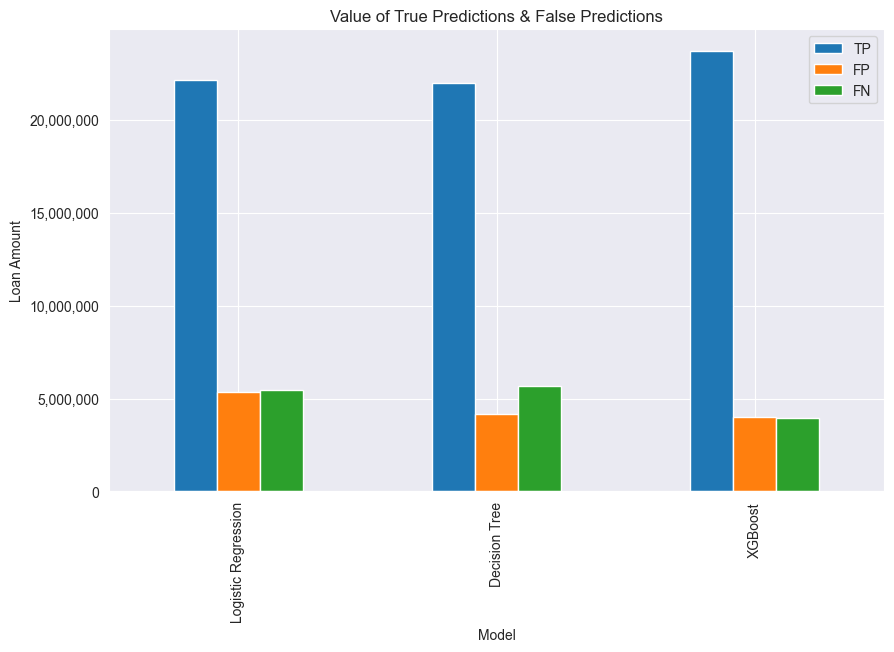

In [28]:
import matplotlib.ticker as ticker

cost_df.plot(kind='bar', x='Name', figsize=(10,6))
# ensure that yaxis dispay full numbers and not scientific
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Value of True Predictions & False Predictions')
plt.ylabel("Loan Amount")
plt.xlabel('Model')

# save
plt.savefig('images/pred_value.png', dpi=300, bbox_inches='tight')

# display
plt.show()

From the above outputs, it can be seen that in terms of identifying defaulters, XGBoost model saves the bank $23,663,097.0 out of all the total defaults

### 📝 **5.1 Recommendation**


In the credit risk domain, recall is more critical than precision. Identifying as many potential defaulters as possible (minimizing false negatives) protects the institution from high financial risk. Although a lower precision (more false positives) means some good customers may be flagged, these cases can be managed through manual review, collateral requirements, or alternative approval workflows.

💡 **Recommended Model:**`XGBoost with SMOTE`

Based on model evaluations, this model offers the best balance between recall, precision, and operational usability, while also satisfying the accuracy requirement.

Why?
1. **High Recall (catching defaulters)**

  XGBoost + SMOTE (82.78%) far outperforms both Logistic Regression (74.76%) and Decision Tree (75.44%) in identifying actual defaulters. In a credit-risk setting, higher recall means fewer missed defaulters, which reduces potential losses.

2. **High Precision (avoiding false alarms)**

  XGBoost + SMOTE also leads with 83.02%, so most flagged high-risk borrowers truly defaulted. This keeps unnecessary manual reviews lower than a model with low precision would.

3. **F1-Score (balance of precision & recall)**

  At 82.90%, XGBoost + SMOTE strikes the best balance, meaning it’s robust both at catching defaulters and not over-flagging good borrowers.

4. **Accuracy**

  XGBoost + SMOTE shows 92.43%, exceeding the 80% target and surpassing the other two models. While overall accuracy can be misleading on imbalanced data, here it corroborates that XGBoost is classifying both classes well.

5. **AUC (ranking ability)**

  With 97.57%, XGBoost + SMOTE is clearly best at separating risky from safe applicants across all thresholds. AUC is especially important when you need to score and rank applicants, not just assign hard labels.

#### ✅ Final Consideration

- Deploy XGBoost with SMOTE as your primary credit-risk scoring model for loan risk assessment.
- Use the model as a tool to segment borrowers into low, medium, and high-risk for tailored credit policy application.
- Periodically retrain and tune the model with fresh data to maintain performance as customer behavior or macroeconomic factors shift.

##### 📌 Implementation Notes

- Thresholds & Tiering:

    Use predicted probabilities to bin applicants into low/medium/high risk categories.
    - Low risk: Automatic approval
    - Medium risk: Additional documentation or collateral
    - High risk: Manual underwriting or denial

- Ongoing Monitoring & Recalibration:

    - Retrain quarterly with new data to capture shifting borrower behavior.
    - Run A/B tests when updating thresholds or retrained models to validate improved performance.

 - Governance:

    - Archive model versions and track performance drift for audit and regulatory reporting.

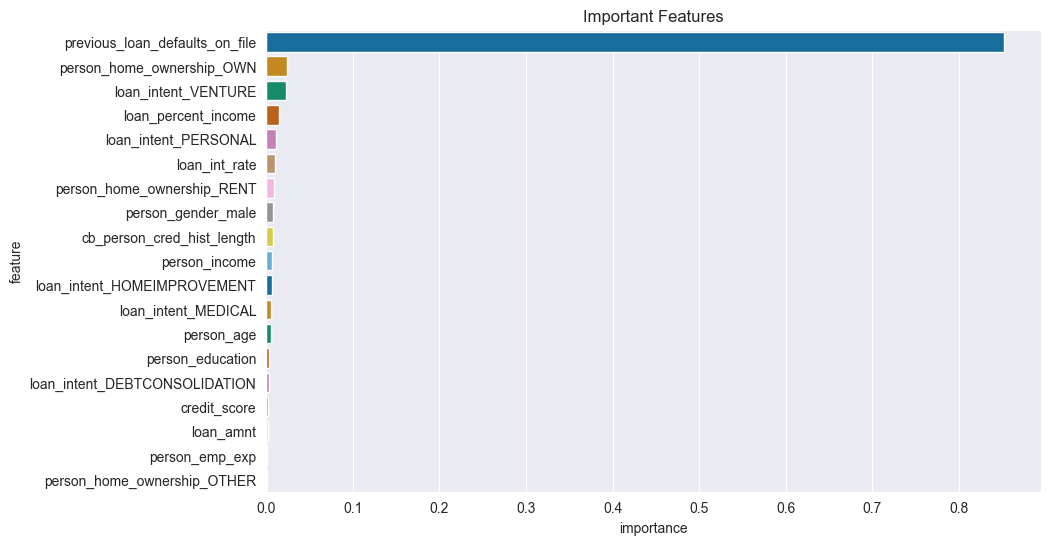

In [29]:
# create a dataframe of the feature importance
feature_importance = (pd.DataFrame({'feature': X_train.columns,
                                    'importance': xg_smote.feature_importances_}
                                    ).sort_values(by='importance',ascending=False))
# feature_importance

# Importance features 
plt.figure(figsize=(10, 6))
sns.barplot(data= feature_importance, 
            x='importance', 
            y='feature', 
            hue='feature', 
            palette='colorblind', 
            legend=False )
plt.title("Important Features")

#save
plt.savefig("images/feature_importance.png", dpi=300, bbox_inches='tight')


The above output shows the ranking of importance features affecting credit risk based on the best model selected.

### ✅  **5.2 Conclusion** 


This credit risk analysis project successfully addressed all four key objectives:

1. **Explore good and bad loans based on borrower characteristics:** 

   Default rates were higher among: 
    - younger borrowers 
    - those with lower education levels
    - for certain loan purposes (medical).

2. **Examine how interest rates relate to risk of default:**

   A strong positive correlation was found between higher interest rates and likelihood of default, indicating that lenders assign higher rates to riskier borrowers, and that these rates may further contribute to repayment challenges.

3. **Identify the most important factors associated with credit risk:**

   Feature importance analysis highlighted the following as those greatly impacting default:
    - loan history
    - home ownership
    - loan intent for venture and personal use 
    - debt to income ratio
    - interest rate  

4. **Build a model to predict risk of default with at least 80% recall, auc score, f1-score and accuracy:**

   Multiple models were built and evaluated. All three models surpassed the 80% accuracy threshold, but XGBoost with SMOTE clearly leads across every key metric, especially recall and AUC, which are paramount in credit-risk contexts. By catching more actual defaulters while keeping false positives relatively low, it offers the best risk-mitigation payoff for the bank. Continuous monitoring and periodic retraining will ensure it remains reliable as market conditions and borrower profiles evolve.
